In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [1034]:
assets = pd.read_csv("https://storage.googleapis.com/m6-bucket-webapp-public/M6_Universe.csv")
display(assets.head())

df = yf.download(list(assets['symbol'].values))
display(df.head())

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


[*********************100%***********************]  100 of 100 completed


Adj Close                                               ... Volume  \
                ABBV ACN       AEP AIZ ALLE AMAT AMP AMZN AVB AVY  ...    XLC   
Date                                                               ...          
1962-01-02       NaN NaN  1.057739 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-03       NaN NaN  1.055813 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-04       NaN NaN  1.040399 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-05       NaN NaN  1.017280 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-08       NaN NaN  1.009572 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   

                                                       
           XLE XLF XLI XLK XLP XLU XLV XLY        XOM  
Date                                                   
1962-01-02 NaN NaN NaN NaN NaN NaN NaN NaN   902400.0  
1962-01-03 NaN NaN NaN NaN NaN NaN NaN NaN  1200000.0  
1962-01-04 NaN NaN NaN NaN NaN NaN NaN NaN  1088000.0  
1962-01-05 NaN NaN NaN NaN NaN NaN NaN NaN  1222400.0  
1962-01-08 NaN NaN NaN NaN NaN NaN NaN NaN  1388800.0  

[5 rows x 600 columns]

## Group Into 20-day returns

In [1035]:
X = df.loc["2010-01-01":]['Adj Close']
X = np.log(X).diff(1)
X2 = X.iloc[X.shape[0] % 20:]
# X = X.rolling(20).sum()
y = X2.fillna(0).rolling(20).sum().shift(-21).replace(0, np.nan)

In [1012]:
X_port = pd.melt(X.reset_index(), id_vars=['Date'])

In [1036]:
y_labels = y.apply(lambda x: pd.qcut(x, [0, .2, .4, .6, .8, 1.], duplicates='drop',labels=False), axis = 1)
ys = pd.melt(y_labels.reset_index(), id_vars=['Date']).dropna(subset=['value'])
ys = ys.sort_values(by='Date').reset_index(drop = True)
ys['value'] = ys['value'].astype(int)
pd.melt(y_labels.reset_index(), id_vars=['Date']).dropna()

,Date,variable,value
741,2012-12-03,ABBV,0.0
742,2012-12-04,ABBV,0.0
743,2012-12-05,ABBV,0.0
744,2012-12-06,ABBV,0.0
745,2012-12-07,ABBV,0.0
...,...,...,...
313974,2022-02-25,XOM,3.0
313975,2022-02-28,XOM,1.0
313976,2022-03-01,XOM,2.0
313977,2022-03-02,XOM,1.0


,Date,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,...,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM,variable,value
0,2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LQD,4
1,2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JPM,0
2,2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EWQ,0
3,2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYG,3
4,2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277431,2022-03-03,0.0056,0.001946,0.029589,0.010133,0.002893,-0.019256,0.001723,-0.0277,0.010005,...,-0.003158,0.001094,-0.012,0.008074,0.017452,0.005094,-0.022905,0.006313,BDX,0
277432,2022-03-03,0.0056,0.001946,0.029589,0.010133,0.002893,-0.019256,0.001723,-0.0277,0.010005,...,-0.003158,0.001094,-0.012,0.008074,0.017452,0.005094,-0.022905,0.006313,DRE,3
277433,2022-03-03,0.0056,0.001946,0.029589,0.010133,0.002893,-0.019256,0.001723,-0.0277,0.010005,...,-0.003158,0.001094,-0.012,0.008074,0.017452,0.005094,-0.022905,0.006313,AEP,2
277434,2022-03-03,0.0056,0.001946,0.029589,0.010133,0.002893,-0.019256,0.001723,-0.0277,0.010005,...,-0.003158,0.001094,-0.012,0.008074,0.017452,0.005094,-0.022905,0.006313,AIZ,3


In [1066]:
data = pd.merge(X, ys, on = 'Date')

In [1068]:
data = pd.merge(X, ys, on = 'Date')
data = data[data.count(axis = 1) > 10].reset_index(drop = True)
data['variable'] = data['variable']
data['asset'] = data['variable'].astype("category")
data = data.set_index(['Date', 'variable'])

In [1071]:
import lightgbm as lgb
params = {"objective":"multiclass", 
          "num_classes":5, 
          "force_row_wise":True}


lgb_data = lgb.Dataset(data.drop('value', axis = 1), data['value'])
booster = lgb.train(params, lgb_data, num_boost_round = 100)

[LightGBM] [Info] Total Bins 25538
[LightGBM] [Info] Number of data points in the train set: 270515, number of used features: 101
[LightGBM] [Info] Start training from score -1.590525
[LightGBM] [Info] Start training from score -1.620908
[LightGBM] [Info] Start training from score -1.616375
[LightGBM] [Info] Start training from score -1.620908
[LightGBM] [Info] Start training from score -1.598866


In [92]:
y_true = pd.get_dummies(df['value']).cumsum(axis = 1)
baseline = np.mean(np.mean((y_true - np.cumsum(np.ones(y_true.shape), axis = 1) / 5) ** 2, axis = 1))

In [95]:
RPS = np.mean((pd.get_dummies(df['value']).cumsum(axis = 1) - np.cumsum(preds, axis = 1)) ** 2, axis = 1).mean()

In [96]:
RPS

0.14662527574716697

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

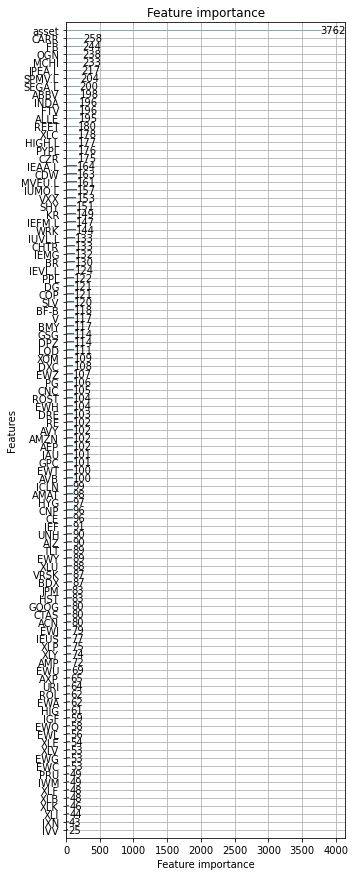

In [109]:
import matplotlib.pyplot as plt
preds = booster.predict(df.drop('value', axis = 1))
fig, ax = plt.subplots(figsize=(5, 15))
lgb.plot_importance(booster, ax = ax)

In [931]:
final = pd.DataFrame()
for x in assets['symbol'].values:
    temp = X.iloc[-1:].copy()
    temp['variable'] = x
    final = pd.concat([final, temp])

In [932]:
final['variable'] = final['variable'].astype("category")

In [982]:
submission = pd.DataFrame(booster.predict(final), index = final['variable']).reset_index()

In [983]:
submission = pd.merge(submission, weights_df.iloc[-1:].T, right_index=True, left_on='variable')

In [984]:
submission.columns = ['ID'] + [f'Rank{i}' for i in range(1, 6)] + ['Decision']

In [985]:
submission.iloc[:, 1:] = submission.iloc[:, 1:].astype(np.float32)

In [986]:
submission['Decision'] = submission['Decision'].clip(-1.0, 1.0)

In [990]:
from numpy.random import default_rng
submission.iloc[:, 1:] = np.around(submission.iloc[:, 1:], 5)
err = submission.iloc[:, 1:6].sum(axis = 1) - 1
rng = default_rng(42)
col = rng.choice(5, 100)
for i in range(100):
    submission.iloc[i, 1 + col[i]] -= err.iloc[i]

col = rng.choice(submission.loc[submission['Decision'] > 0].index)    
err = submission.iloc[:, 6].sum() - 1
submission.iloc[col, 6] -= round(err, 5)


In [991]:
col

85

In [992]:
err = submission.iloc[:, 6].sum() - 1

In [997]:
submission.to_csv("submissin.csv", index=False, float_format = "%.5f")

In [994]:
submission['Decision'].max()

0.431

In [995]:
submission.min()

ID             ABBV
Rank1       0.00155
Rank2       0.10549
Rank3       0.04163
Rank4       0.02411
Rank5        0.0083
Decision        0.0
dtype: object

In [996]:
submission['Decision'].abs().sum()

0.99999994

# Portfolio

In [171]:
X3 = X2.reset_index().copy()

In [174]:
X3['Date'] = pd.to_datetime(X3['Date'])
X3['DayDummy'] = X3['Date'].astype('category').cat.codes

In [175]:
X3['20block'] = X3['DayDummy'] // 20

In [176]:
X3 = X3.set_index(['20block', 'Date', 'DayDummy'])

In [177]:
X3

ABBV       ACN       AEP       AIZ      ALLE  \
20block Date       DayDummy                                                     
0       2010-01-19 0              NaN       NaN       NaN       NaN       NaN   
        2010-01-20 1              NaN -0.005501  0.002193 -0.017341       NaN   
        2010-01-21 2              NaN -0.009700 -0.011290  0.032471       NaN   
        2010-01-22 3              NaN -0.021345 -0.019293  0.016791       NaN   
        2010-01-25 4              NaN -0.007138  0.005630  0.009069       NaN   
...                               ...       ...       ...       ...       ...   
156     2022-03-28 3135      0.003959  0.009203  0.007920 -0.004400  0.010453   
        2022-03-29 3136      0.001296  0.029640  0.011004 -0.012932  0.013740   
        2022-03-30 3137      0.009634 -0.006567  0.007370  0.004732 -0.014886   
        2022-03-31 3138     -0.010066 -0.003641  0.003514 -0.001868 -0.032002   
        2022-04-01 3139      0.003510  0.010061  0.017290  0.019551  0.015726   

                                 AMAT       AMP      AMZN       AVB       AVY  \
20block Date       DayDummy                                                     
0       2010-01-19 0              NaN       NaN       NaN       NaN       NaN   
        2010-01-20 1        -0.012244 -0.003812 -0.014444 -0.022630 -0.011546   
        2010-01-21 2        -0.016071 -0.027830  0.006656 -0.022766 -0.024276   
        2010-01-22 3        -0.072523 -0.024594 -0.041853 -0.024356 -0.001035   
        2010-01-25 4         0.000792  0.016711 -0.009266  0.014998 -0.001036   
...                               ...       ...       ...       ...       ...   
156     2022-03-28 3135      0.004368 -0.011283  0.025271  0.011061  0.002077   
        2022-03-29 3136      0.027089  0.003594  0.001918  0.032546  0.030649   
        2022-03-30 3137     -0.040692 -0.005202 -0.017961 -0.018561 -0.011638   
        2022-03-31 3138     -0.029898 -0.033524 -0.020065 -0.014311 -0.016306   
        2022-04-01 3139     -0.033875 -0.009870  0.003445  0.024146  0.006132   

                             ...       XLC       XLE       XLF       XLI  \
20block Date       DayDummy  ...                                           
0       2010-01-19 0         ...       NaN       NaN       NaN       NaN   
        2010-01-20 1         ...       NaN -0.015674 -0.002647 -0.015430   
        2010-01-21 2         ...       NaN -0.020594 -0.028910 -0.023424   
        2010-01-22 3         ...       NaN -0.024043 -0.033290 -0.015327   
        2010-01-25 4         ...       NaN  0.006551  0.005626  0.006444   
...                          ...       ...       ...       ...       ...   
156     2022-03-28 3135      ...  0.003175 -0.025074 -0.002787  0.000289   
        2022-03-29 3136      ...  0.017285 -0.002608  0.002281  0.009210   
        2022-03-30 3137      ... -0.007106  0.011552 -0.007114 -0.001147   
        2022-03-31 3138      ... -0.019152 -0.013643 -0.023215 -0.015513   
        2022-04-01 3139      ...  0.007388  0.008078 -0.002613 -0.007799   

                                  XLK       XLP       XLU       XLV       XLY  \
20block Date       DayDummy                                                     
0       2010-01-19 0              NaN       NaN       NaN       NaN       NaN   
        2010-01-20 1        -0.016183 -0.007454 -0.010609 -0.008521 -0.013587   
        2010-01-21 2        -0.010639 -0.014318 -0.014651 -0.021938 -0.012761   
        2010-01-22 3        -0.035378 -0.002280 -0.022219 -0.010994 -0.019451   
        2010-01-25 4         0.008276  0.001900  0.006685  0.000000  0.005156   
...                               ...       ...       ...       ...       ...   
156     2022-03-28 3135      0.011812  0.004123  0.006437  0.007239  0.026319   
        2022-03-29 3136      0.021014  0.008853  0.009240  0.005884  0.017274   
        2022-03-30 3137     -0.013423  0.000658  0.008217  0.001954 -0.015310   
        2022-03-31 3138     -0.014926 -0.0023

In [179]:
X3 = X3.fillna(0)

$(20 \times 100) \times (100 \times 1)$

In [349]:
i = 86


In [351]:
np.linalg.inv(X2.loc[86].loc[rows, cols].cov())

array([[-1.21759908e+19, -2.34701364e+19,  1.04631042e+19, ...,
         8.48941511e+18, -7.63143518e+19, -3.40715873e+19],
       [-7.59708251e+18,  5.55747728e+18,  3.06682533e+18, ...,
        -7.13441858e+18,  1.80063462e+19,  7.66484744e+18],
       [-8.09559852e+17,  8.61876439e+18,  1.64165902e+18, ...,
        -2.73328791e+19,  5.67251910e+19,  2.13298938e+19],
       ...,
       [ 1.72524624e+18, -4.50856313e+18,  4.12883209e+18, ...,
         6.61748367e+18, -9.80858881e+18, -6.69547640e+18],
       [ 1.23745859e+19,  1.88239997e+19,  4.71267955e+18, ...,
        -2.09923491e+19,  6.16516430e+19,  2.20056197e+19],
       [-1.28228938e+19, -9.17585524e+17, -1.25329097e+18, ...,
         1.83163008e+19, -1.42653455e+19, -1.59467937e+18]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(X2.loc[86].loc[rows, cols].cov(), annot=True, ax = ax)

<AxesSubplot:>

In [182]:
from tqdm.notebook import tqdm

In [183]:
weights_all = []
for i in tqdm(range(157)):
    cols = X3.columns[(X3.loc[i].std(axis = 0) != 0) & (X3.loc[i].count(axis = 0) > 1)]
    rows = (X3.loc[i].std(axis = 1) != 0) & (X3.loc[i].count(axis = 1) > 1)
    temp = np.linalg.inv(X3.loc[i].loc[rows, cols].cov()) @ np.ones((len(cols), 1))
    weights = dict(zip(cols, list((temp / np.sum(temp)).reshape(-1))))
    weights_all += [weights]

  0%|          | 0/157 [00:00<?, ?it/s]

In [261]:
inverse_vol_weighted = lambda N_a, x: np.linalg.inv(np.diag(np.diag(x))) @ np.ones((N_a, 1))
min_var_weighted = lambda N_a, x: np.linalg.inv(x) @ np.ones((N_a, 1))
oon_weighted = lambda N_a, x: np.ones((N_a, 1))
mean_var = lambda mu, cov: cov @ mu
momentum = lambda mu: (mu > 0)

In [285]:
X3.loc[i].loc[rows, cols].mean() / X3.loc[i].loc[rows, cols].std()

ABBV    0.382208
ACN     0.239411
AEP     0.274105
AIZ     0.466686
ALLE   -0.123642
          ...   
XLP     0.066174
XLU     0.424657
XLV     0.186876
XLY     0.175740
XOM    -0.020503
Length: 100, dtype: float64

In [635]:
from pypfopt.efficient_frontier import EfficientCVaR, EfficientCDaR, EfficientSemivariance, EfficientFrontier
from pypfopt.cla import CLA

In [675]:
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

In [823]:
from pypfopt.hierarchical_portfolio import HRPOpt
weights_all = []
for i in tqdm(range(157)):
    
    # temp = oon_weighted(len(cols), X2.loc[i].loc[rows, cols].cov()) 
    # mu = X3.loc[i].loc[rows, cols].mean().values.reshape((-1, 1))
    # temp = np.clip(mean_var(mu, X3.loc[i].loc[rows, cols].cov()).values, -1, 1)
    # temp = momentum(mu)
    # temp = np.clip(inverse_vol_weighted(len(cols), X3.loc[i].loc[rows, cols].cov()), -1, 1)
    # temp = (-X3.loc[i].loc[rows, cols].mean() / X3.loc[i].loc[rows, cols].std()).values
    # temp = min_var_weighted(len(cols), X3.loc[i].loc[rows, cols].cov())
    # weights = dict(zip(cols, list((temp / np.sum(np.abs(temp))).reshape(-1))))
    # temp = HRPOpt(returns = pd.DataFrame(X3.loc[i].loc[rows, cols]), 
    #    cov_matrix = X3.loc[i].loc[rows, cols].cov())
    # weights = temp.clean_weights()
    # mu = mean_historical_return(X3.loc[i].loc[rows, cols], returns_data=True, log_returns=True, compounding=False)
    # # mu = ((mu > 0) + (mu < 0)) * 1
    # cov = CovarianceShrinkage(X3.loc[i].loc[rows, cols], returns_data=True).ledoit_wolf()
    # es = EfficientFrontier(mu, cov, weight_bounds= (0, 1))
    # weights = es.max_sharpe()
    # weights = es.clean_weights()

    # try:
    # es = EfficientCDaR(X3.loc[i].loc[rows, cols].mean(), X3.loc[i].loc[rows, cols], weight_bounds= (0, 1), beta = 0.99)
    # weights = es.min_cdar()
    # weights = es.clean_weights()
    
    # es = EfficientCVaR(X3.loc[i].loc[rows, cols].mean(), X3.loc[i].loc[rows, cols], weight_bounds= (0, 1), beta = 0.99)
    # weights = es.min_cvar()
    # weights = es.clean_weights()
    
    cols = X3.columns[(X3.loc[(i - 10):(i + 1)].std(axis = 0) != 0) & (X3.loc[(i - 10):(i + 1)].count(axis = 0) > 1)]
    rows = (X3.loc[(i - 10):(i + 1)].std(axis = 1) != 0) & (X3.loc[(i - 10):(i + 1)].count(axis = 1) > 1)
    es = EfficientSemivariance(X3.loc[(i - 10):(i + 1)].loc[rows, cols].mean(), X3.loc[(i - 10):(i + 1)].loc[rows, cols], weight_bounds= (0, 1))
    weights = es.max_quadratic_utility()
    weights = es.clean_weights()
    # except:
    #     pass
    # es = HRPOpt(X3.loc[i].loc[rows, cols], X3.loc[i].loc[rows, cols].cov())
    # es = HRPOpt(None, X3.loc[i].loc[rows, cols].cov())
    # weights = es.optimize(linkage_method='single')
    # weights = es.clean_weights()
    # cl = CLA(X3.loc[i].loc[rows, cols].mean(), X3.loc[i].loc[rows, cols].cov(), weight_bounds=(0, 1))
    # weights = cl.max_sharpe()
    # weights = cl.clean_weights()
    weights_all += [weights.copy()]

  0%|          | 0/157 [00:00<?, ?it/s]

In [998]:
weights_df = pd.DataFrame(weights_all)
weights_df.index.name = "20block"
weights_df = (weights_df.T / weights_df.abs().sum(axis = 1)).T
weights_df = weights_df.ewm(alpha = 1).mean()
rets = (weights_df.shift(1).fillna(0) * X3).sum(axis = 1)

0.9171974522292994
0.29523168609754735 0.21345524786583536 1.0


count    156.000000
mean       0.295232
std        0.213455
min       -0.227936
25%        0.150068
50%        0.287928
75%        0.430495
max        0.952285
dtype: float64

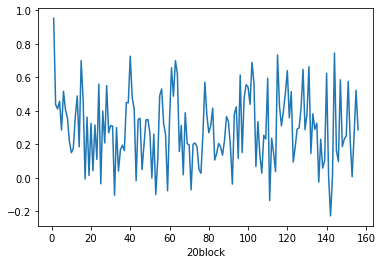

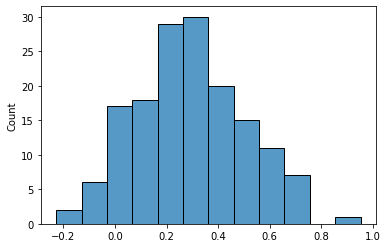

In [999]:
mus = rets.groupby('20block').mean()
sds = rets.groupby('20block').std()
(mus / sds).plot()

import seaborn as sns
fig, ax = plt.subplots()
sns.histplot(mus / sds)
print(np.mean((mus / sds) > 0))
print((mus / sds).mean(), (mus / sds).std(), (mus / sds > 0).iloc[-10:].mean())
(mus / sds).describe()

In [699]:
weights_df

,ACN,AEP,AIZ,AMAT,AMP,AMZN,AVB,AVY,AXP,BDX,...,FTV,IUMO.L,IUVL.L,JPEA.L,HIGH.L,IEAA.L,VXX,XLC,CARR,OGN
20block,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101669,0.000000,0.000000,0.001570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.000000,0.012790,0.017110,0.000000,0.087888,0.000000,0.073829,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006350,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014720,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.065020,0.000000,0.0000,0.000000
153,0.000000,0.089908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.051299,0.000000,0.0000,0.042319
154,0.000000,0.000000,0.000000,0.000000,0.000000,0.008550,0.000000,0.000000,0.037059,0.034639,...,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.098788,0.000000,0.0000,0.003920


0.6687898089171974


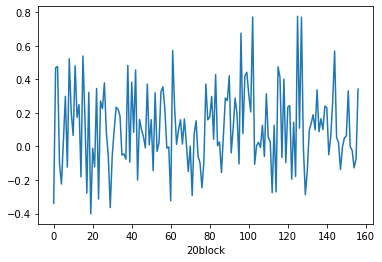

In [275]:
rets2 = X3.mean(axis = 1)
mus2 = rets2.groupby('20block').mean()
sds2 = rets2.groupby('20block').std()
(mus2 / sds2).plot()
(mus2 / sds2).describe()
print(np.mean((mus2 / sds2) > 0))

In [259]:
weights

{'ACN': array([-0.78393065]),
 'AEP': array([-0.2562868]),
 'AIZ': array([0.0902885]),
 'AMAT': array([-0.05966899]),
 'AMP': array([0.09847582]),
 'AMZN': array([0.18556563]),
 'AVB': array([0.01713581]),
 'AVY': array([-0.03270036]),
 'AXP': array([0.12504868]),
 'BDX': array([-0.12481741]),
 'BF-B': array([0.03634014]),
 'BMY': array([-0.09378718]),
 'BR': array([0.08497008]),
 'CE': array([0.30997534]),
 'CHTR': array([-0.45573016]),
 'CNC': array([-0.18020699]),
 'CNP': array([-0.03618608]),
 'COP': array([0.14835436]),
 'CTAS': array([0.03424721]),
 'DG': array([-0.26011061]),
 'DPZ': array([0.13676477]),
 'DRE': array([-0.0935435]),
 'DXC': array([0.0520492]),
 'EWA': array([-0.00169438]),
 'EWC': array([-0.00639373]),
 'EWG': array([0.04398622]),
 'EWH': array([-0.1620032]),
 'EWJ': array([0.04241151]),
 'EWL': array([0.046623]),
 'EWQ': array([0.09074275]),
 'EWT': array([0.00011889]),
 'EWU': array([0.03578964]),
 'EWY': array([-0.02418664]),
 'EWZ': array([0.09779289]),
 'GO

In [221]:
sds = rets.groupby('20block').std()

<AxesSubplot:xlabel='20block'>

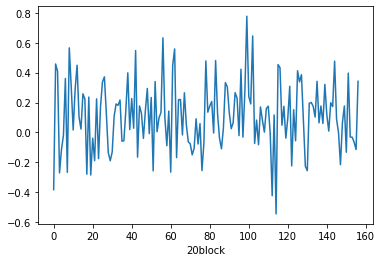

In [223]:
(mus / sds).plot()

In [3]:
df2 = df.iloc[-3000:][['Adj Close']].reset_index().fillna(method='ffill')
temp = df2.groupby(df2.index // 20).nth(0)
df2 = np.log(df2.groupby(df2.index // 20).nth(-1).iloc[:, 1:] / temp.iloc[:, 1:]).set_index(temp.iloc[:, 0])
# No ties in dataset
# (df2.apply(lambda x: len(np.unique(x[~np.isnan(x)])), axis = 1) == (~df2.isnull()).sum(axis = 1)).sum()

df2.index.name = "Date"
df2.columns = list(df2.columns.levels[1][:-1])

df2

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,NaN,-0.080668,-0.018644,-0.047481,NaN,-0.114947,0.013742,0.011129,-0.022682,-0.115024,...,NaN,-0.081510,-0.103796,-0.082377,-0.069763,-0.022053,-0.005852,-0.039616,-0.047605,-0.054013
2010-08-31,NaN,0.129973,0.031413,0.099628,NaN,0.106903,0.077037,0.244276,-0.002379,0.111614,...,NaN,0.077271,0.065815,0.107815,0.115088,0.058626,0.032989,0.084789,0.106647,0.043046
2010-09-28,NaN,0.092498,-0.007105,0.016626,NaN,0.035180,0.070823,0.056602,0.044468,0.072960,...,NaN,0.069822,0.004823,0.036880,0.043099,0.028805,0.008210,0.023197,0.041794,0.064578
2010-10-26,NaN,-0.024948,-0.006168,-0.170362,NaN,0.041349,0.030955,0.002586,0.000823,-0.037466,...,NaN,0.061986,0.004793,0.007677,0.008626,0.003129,-0.015888,-0.009628,0.030111,0.059830
2010-11-23,NaN,0.107897,0.007816,0.071529,NaN,0.091567,0.068018,0.085916,0.016907,0.121377,...,NaN,0.069379,0.079115,0.073717,0.044660,0.038456,0.021890,0.040536,0.052451,0.045900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,0.043948,0.022465,0.016924,-0.025463,0.000528,0.023401,-0.018231,0.014483,0.018254,-0.025834,...,-0.035471,-0.007482,-0.024512,-0.007666,0.047320,-0.001099,0.032166,0.004870,0.019744,-0.029349
2021-12-09,0.090208,0.066975,0.068817,0.003782,-0.009406,0.007115,0.057472,-0.057997,0.041282,0.011421,...,-0.005408,0.053729,0.032338,0.014289,-0.016476,0.067843,0.034088,0.022378,0.000612,0.064029
2022-01-06,0.035083,-0.047674,0.007819,-0.018393,-0.063586,-0.104977,-0.018944,-0.080597,-0.001191,-0.064212,...,-0.004590,0.123879,-0.020358,-0.035158,-0.022708,-0.006876,-0.007758,-0.012594,-0.092376,0.165544


In [4]:
from tqdm import tqdm
quantiles = df2.apply(lambda x: pd.qcut(x, [0, .2, .4, .6, .8, 1.], labels=False), axis = 1)
df3 = pd.DataFrame()
for i in tqdm(range(100)):
    temp = quantiles.iloc[:, [i]].rename({quantiles.columns[i]:"next_rank"}, axis = 1).shift(-1)
    temp['asset'] = quantiles.columns[i]
    temp['next_ret'] = df2.iloc[:, i].shift(-1)
    temp = pd.concat([df2, temp], axis = 1)
    df3 = pd.concat([df3, temp])
df3

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 117.72it/s]


,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLI,XLK,XLP,XLU,XLV,XLY,XOM,next_rank,asset,next_ret
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,NaN,-0.080668,-0.018644,-0.047481,NaN,-0.114947,0.013742,0.011129,-0.022682,-0.115024,...,-0.082377,-0.069763,-0.022053,-0.005852,-0.039616,-0.047605,-0.054013,NaN,ABBV,NaN
2010-08-31,NaN,0.129973,0.031413,0.099628,NaN,0.106903,0.077037,0.244276,-0.002379,0.111614,...,0.107815,0.115088,0.058626,0.032989,0.084789,0.106647,0.043046,NaN,ABBV,NaN
2010-09-28,NaN,0.092498,-0.007105,0.016626,NaN,0.035180,0.070823,0.056602,0.044468,0.072960,...,0.036880,0.043099,0.028805,0.008210,0.023197,0.041794,0.064578,NaN,ABBV,NaN
2010-10-26,NaN,-0.024948,-0.006168,-0.170362,NaN,0.041349,0.030955,0.002586,0.000823,-0.037466,...,0.007677,0.008626,0.003129,-0.015888,-0.009628,0.030111,0.059830,NaN,ABBV,NaN
2010-11-23,NaN,0.107897,0.007816,0.071529,NaN,0.091567,0.068018,0.085916,0.016907,0.121377,...,0.073717,0.044660,0.038456,0.021890,0.040536,0.052451,0.045900,NaN,ABBV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-11,0.043948,0.022465,0.016924,-0.025463,0.000528,0.023401,-0.018231,0.014483,0.018254,-0.025834,...,-0.007666,0.047320,-0.001099,0.032166,0.004870,0.019744,-0.029349,4.0,XOM,0.064029
2021-12-09,0.090208,0.066975,0.068817,0.003782,-0.009406,0.007115,0.057472,-0.057997,0.041282,0.011421,...,0.014289,-0.016476,0.067843,0.034088,0.022378,0.000612,0.064029,4.0,XOM,0.165544
2022-01-06,0.035083,-0.047674,0.007819,-0.018393,-0.063586,-0.104977,-0.018944,-0.080597,-0.001191,-0.064212,...,-0.035158,-0.022708,-0.006876,-0.007758,-0.012594,-0.092376,0.165544,3.0,XOM,0.021636


In [87]:
# df3.loc[df3['next_rank'] == -1, 'next_rank'] = np.nan
oos = df3.loc[df3['next_rank'].isnull()].groupby('asset').last().copy().reset_index()

df3 = df3.loc[~df3['next_rank'].isnull()]
df3.loc[:, 'next_rank'] = df3.loc[:, 'next_rank'].astype(int)
df3.loc[:, 'asset'] = df3.loc[:, 'asset'].astype("category")
oos = oos.reset_index()
oos = oos.loc[:, df3.columns]
oos['asset'] = oos['asset'].astype('category')

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [89]:
df3 = (df3.
 reset_index().
 sort_values(by = 'Date').
 reset_index(drop = True).
 set_index('Date'))

In [69]:
_, groups = np.unique(df3.index, return_counts=True)

In [70]:
import lightgbm as lgb

**ranker**

In [71]:
lgbr = lgb.LGBMRanker(n_estimators=100,objective="lambdarank",metric="ndcg")
lgbr.fit(df3.drop(['next_rank', 'next_ret'], axis = 1), 
         df3['next_rank'], group = groups)

LGBMRanker(metric='ndcg', objective='lambdarank')

In [72]:
preds = lgbr.predict(df3.drop(['next_rank', 'next_ret'], axis = 1))
df4 = df3.copy()
df4['preds'] = preds
pred_ranks = pd.pivot_table(df4[['preds','asset']], values='preds', columns = 'asset', index = df3.index)
pred_ranks

asset,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,NaN,-0.544688,-0.412270,-0.081309,NaN,-0.723971,0.281808,0.544611,-1.012414,-1.206867,...,NaN,-1.607260,-1.705749,-1.632949,-1.059585,-1.298908,-0.104955,-1.124514,-1.572780,-1.356300
2010-08-05,NaN,0.930646,-0.291235,-0.746331,NaN,0.494219,0.179041,0.650583,0.179611,1.177386,...,NaN,-0.245936,-0.340129,-1.852421,-1.047166,-1.828870,-0.766758,-1.501234,-1.434976,-0.729657
2010-09-02,NaN,0.140360,-0.595211,-0.279610,NaN,0.003763,-0.029577,0.884387,-0.679700,-0.675994,...,NaN,-1.136188,-1.229167,-2.022646,-1.274633,-2.124724,-0.715085,-1.914474,-1.864105,-1.197559
2010-09-30,NaN,-0.562468,-0.521652,-0.329976,NaN,-0.117761,-0.097609,1.034398,0.111496,-0.674148,...,NaN,-0.941053,-1.251047,-1.854623,-1.304554,-1.684961,-0.792557,-1.866622,-1.563128,-0.799328
2010-10-28,NaN,0.152326,-0.693868,-0.564850,NaN,0.614275,0.622670,-0.181891,-0.383922,-0.483382,...,NaN,-0.706080,-0.699192,-2.266998,-1.607283,-2.207542,-1.092422,-1.798801,-2.151906,-1.080963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20,0.449020,0.257358,-0.528522,-0.240636,-1.227749,0.621647,0.492187,-0.383936,0.014925,-0.116398,...,-1.631371,-0.565571,-0.740330,-2.238095,-0.895120,-2.181909,-0.597015,-1.656564,-1.878014,-0.081099
2021-10-18,1.124055,0.659416,0.878718,-0.105625,-1.097614,-0.153500,0.015198,0.025867,0.162449,0.004095,...,-1.559773,-0.424500,-0.953387,-1.781618,-1.194906,-1.184282,0.721510,-1.390639,-1.556248,-0.692591
2021-11-15,0.595068,-0.345236,-0.355509,-0.030232,-1.038837,-0.236610,1.397939,-0.691521,-0.269494,-0.682094,...,-1.125821,0.444037,0.002749,-1.560779,-1.449880,-1.555967,-0.612095,-1.606466,-1.318204,0.098881


## Metrics

Normalised Cumulative Discounted Gain: A perfect score procues a ranking of 1

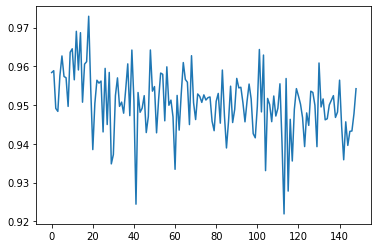

In [73]:
from sklearn.metrics import ndcg_score
ndcg_scores = np.zeros(149)

for i in range(149):
    ndcg_scores[i] = ndcg_score(quantiles.shift(-1).iloc[[i]].T.dropna().T.values, pred_ranks.iloc[[i]].T.dropna().T.values)
import matplotlib.pyplot as plt
plt.plot(ndcg_scores)

# Portfolio

Map Predictions (Ranks, Probabilities) to weights via some function


$$f(\hat{y}_{t}) \rightarrow w_{t}$$

Maximise the *information ratio* of our portfolio

$$E[R_{p, t}] / SD(R_{p, t}), R_{p, t} = w_{t} \cdot R_{t}$$

https://github.com/microprediction/precise

Partial Moments

+ https://arxiv.org/pdf/2112.15499.pdf

In [74]:
from scipy.special import softmax
weights = pred_ranks.fillna(-99999).apply(lambda x: softmax(x), axis = 1)
weights

asset,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,0.000000,0.011653,0.013303,0.018522,0.000000,0.009740,0.026630,0.034635,0.007300,0.006010,...,0.000000,0.004027,0.003649,0.003925,0.006963,0.005481,0.018089,0.006526,0.004168,0.005176
2010-08-05,0.000000,0.036605,0.010786,0.006843,0.000000,0.023659,0.017263,0.027663,0.017273,0.046848,...,0.000000,0.011286,0.010272,0.002264,0.005065,0.002318,0.006704,0.003217,0.003437,0.006958
2010-09-02,0.000000,0.020069,0.009618,0.013187,0.000000,0.017507,0.016933,0.042234,0.008839,0.008871,...,0.000000,0.005599,0.005102,0.002308,0.004875,0.002084,0.008531,0.002571,0.002704,0.005266
2010-09-30,0.000000,0.009863,0.010274,0.012445,0.000000,0.015387,0.015700,0.048700,0.019352,0.008821,...,0.000000,0.006755,0.004954,0.002709,0.004696,0.003210,0.007836,0.002677,0.003626,0.007783
2010-10-28,0.000000,0.021840,0.009370,0.010661,0.000000,0.034664,0.034956,0.015635,0.012775,0.011566,...,0.000000,0.009257,0.009321,0.001943,0.003759,0.002062,0.006290,0.003104,0.002180,0.006363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-20,0.025829,0.021324,0.009718,0.012959,0.004829,0.030695,0.026968,0.011229,0.016733,0.014674,...,0.003226,0.009364,0.007863,0.001758,0.006735,0.001860,0.009074,0.003145,0.002520,0.015201
2021-10-18,0.036774,0.023107,0.028773,0.010752,0.003987,0.010250,0.012133,0.012263,0.014058,0.011999,...,0.002512,0.007816,0.004606,0.002012,0.003618,0.003656,0.024588,0.002975,0.002521,0.005978
2021-11-15,0.027508,0.010742,0.010632,0.014720,0.005369,0.011975,0.061396,0.007598,0.011587,0.007670,...,0.004921,0.023652,0.015213,0.003186,0.003559,0.003201,0.008226,0.003043,0.004060,0.016748


In [76]:
rets = (np.exp(df2.shift(-1).iloc[:-1]) - 1)

In [77]:
rets = (weights * (np.exp(df2.shift(-1).iloc[:-1]) - 1)).sum(axis = 1)
display(rets)

Date
2010-07-08   -0.001962
2010-08-05    0.078738
2010-09-02    0.060003
2010-09-30    0.036432
2010-10-28    0.073016
                ...   
2021-09-20    0.047817
2021-10-18   -0.001010
2021-11-15    0.037995
2021-12-13    0.006114
2022-01-10    0.576287
Length: 149, dtype: float64

<AxesSubplot:xlabel='Date'>

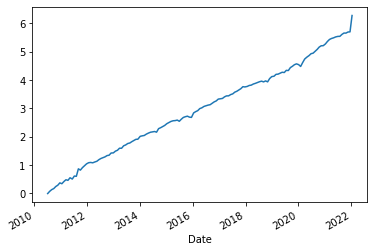

In [78]:
rets.cumsum().plot()

In [79]:
weights = df2.copy()
weights[~weights.isna()] = 1
weights = weights.div(weights.count(axis = 1),axis = 0)
weights = weights.fillna(0)

In [80]:
weights

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-08,0.00,0.013333,0.013333,0.013333,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,...,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
2010-08-05,0.00,0.013333,0.013333,0.013333,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,...,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
2010-09-02,0.00,0.013333,0.013333,0.013333,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,...,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
2010-09-30,0.00,0.013333,0.013333,0.013333,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,...,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
2010-10-28,0.00,0.013333,0.013333,0.013333,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,...,0.00,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,0.01,0.010000,0.010000,0.010000,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
2021-11-15,0.01,0.010000,0.010000,0.010000,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
2021-12-13,0.01,0.010000,0.010000,0.010000,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.01,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000


# Test Cases

Probabilities rounded to 5dp have to sum to 1:

$|1 - Sum_{j = 1}^{5} P_{ij} | < 1e-5$

100 x 7 dataframe

Long format

(T x N) x F




In [144]:
action = pd.read_csv("submission.csv")

In [143]:
action = pd.read_csv("submission.csv")
temp =  pd.DataFrame(lgbr.predict(oos.drop(['next_rank', 'next_ret'], axis = 1)), index = oos['asset'], columns=['action'])
temp = temp.fillna(-99999).apply(lambda x: softmax(x), axis = 0)

NameError: name 'lgbr' is not defined

In [112]:
action = pd.merge(action, temp, left_on='ID', right_index=True)
action.to_csv("submission.csv", index=False)

In [ ]:
col_names = "ID", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5", "Decision"
